# IMPORTS & CONFIGS 

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import os
import glob
from scipy import signal
from scipy.stats import norm
from scipy.optimize import curve_fit
import re

# DATA PROCESSING FUNCTIONS

In [90]:
def data_start(dir: str) -> object:
    df = pd.read_csv(dir, sep=';',decimal='.', index_col=False, skiprows=10, usecols=range(4), encoding='iso-8859-1')
    df['datetime'] = pd.to_datetime(df.iloc[:, 0])
    # Drop the original date and time columns by index
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.replace(-9999, np.nan, inplace=True)
    df = df.dropna()
    
    df['year_month'] = df['datetime'].dt.to_period('M')
    df.drop(df.columns[[-2]], axis=1, inplace=True)
    target_columns = ['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)', 'TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)', 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)']

    df[target_columns] = df[target_columns].map(
        lambda x: re.sub(r'^\.(\d+)', r'0.\1', x) if isinstance(x, str) else x
    ).astype(float)
    
    monthly_avg = df.groupby('year_month').mean(numeric_only=True)
    monthly_avg.reset_index(inplace=True)

    del df
    monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp() 
    return monthly_avg.sort_values("year_month")

In [91]:
def plot(df: object) -> None:
    plt.figure(figsize=(10, 5))

    # Plot the 'x' column
    for i in df.columns:
        if i != 'year_month':
            plt.plot(df['year_month'], df[i], linestyle='-', label=i)  

    # Adding titles and labels
    plt.title('Data x Months')
    plt.xlabel('DATA')
    plt.ylabel('YEAR_MOUNTH')

    # Adding a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

In [92]:
def plot_fft(data, column_name):
    n = len(data)
    # Compute the FFT
    fft_values = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(n)
    
    # Only take the positive frequencies
    fft_values = fft_values[:n//2]
    fft_freq = fft_freq[:n//2]
    
    # Plot the FFT
    plt.figure(figsize=(10, 6))
    plt.plot(fft_freq, np.abs(fft_values))
    plt.title(f'FFT of {column_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

In [93]:
def fft_process(dataframes):
    for i, df in dataframes.items():
        print(f"Processing DataFrame {i}/{len(dataframes)}")
        for column in df.columns:
            if column == 'year_month':
                continue
            print(f"Plotting FFT for column: {column} from {i}")
            plot_fft(df[column].dropna().values, column)

In [94]:
def apply_convolution(x, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(x, conv, mode='same') / window
    return filtered

# MAIN

dados_A001_D_2000-05-06_2024-05-26


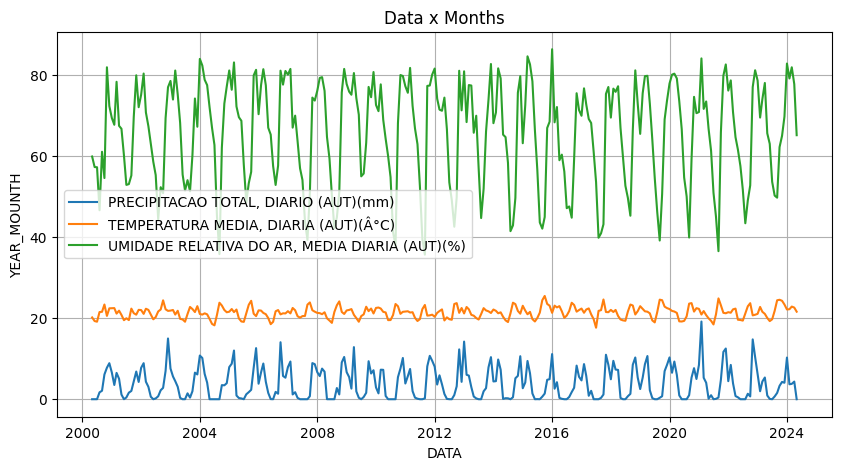

dados_A008_D_2003-06-12_2013-02-19


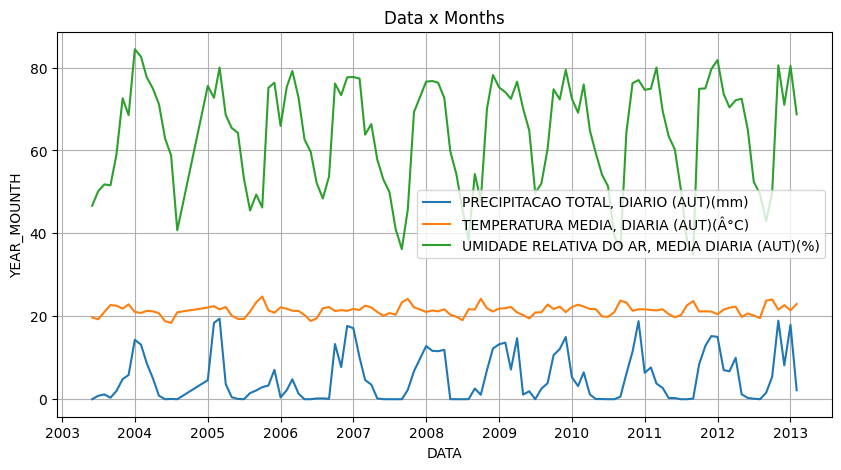

dados_A042_D_2017-07-18_2024-05-26


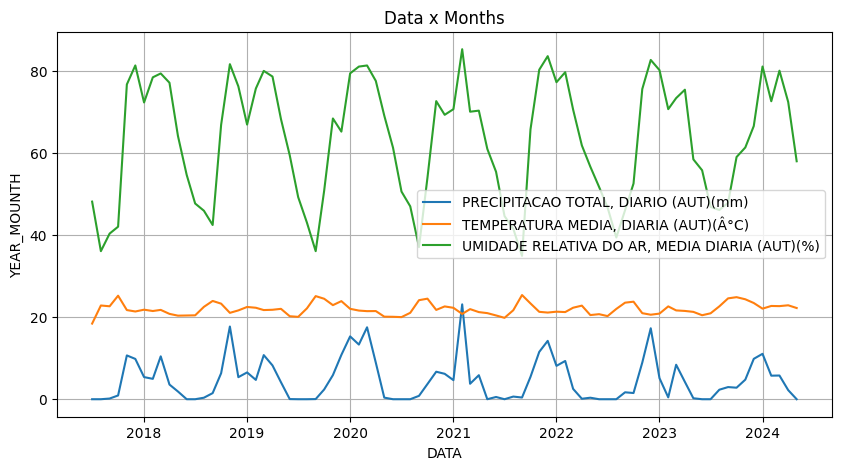

dados_A045_D_2008-10-02_2024-05-26


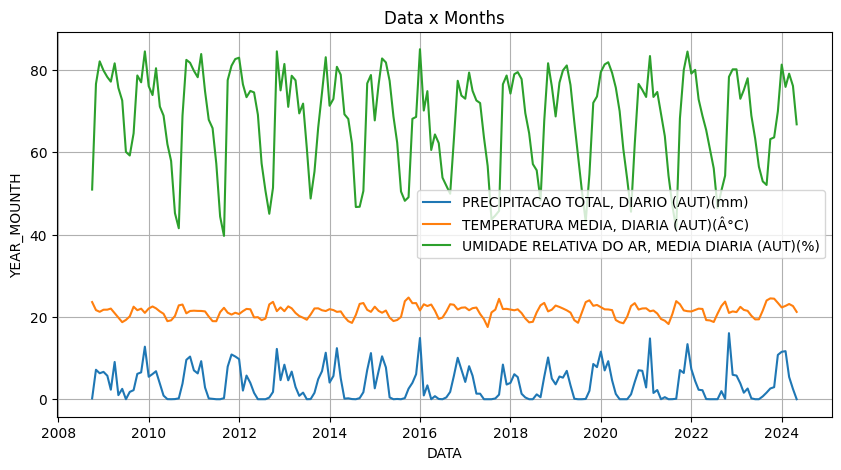

dados_A046_D_2014-09-30_2024-05-26


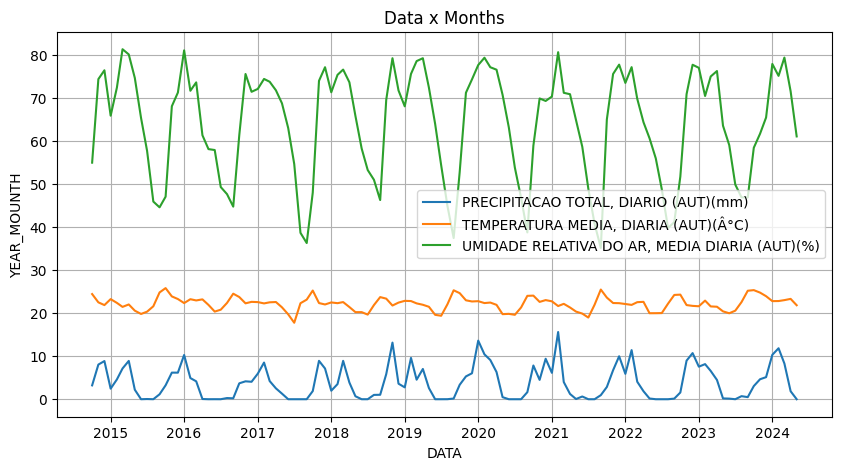

dados_A047_D_2017-02-06_2024-05-26


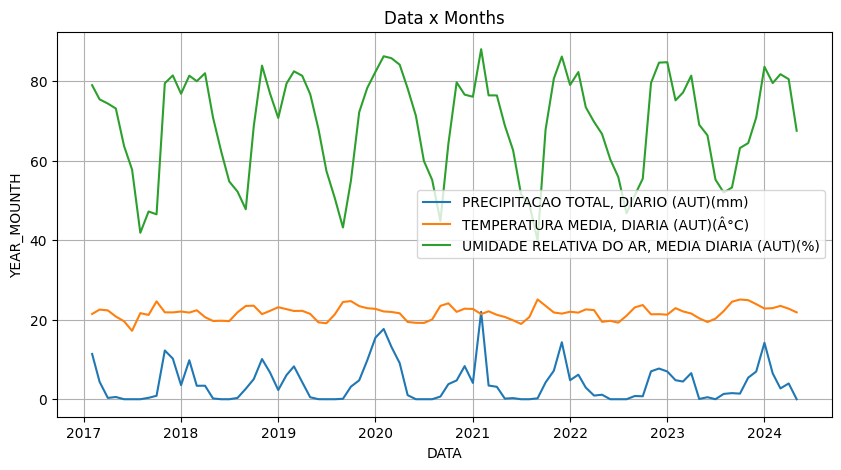

In [95]:
data_dir = "../Data/Auto"
filepaths = glob.glob(os.path.join(data_dir, "*.csv"))
stations = {}
for file in filepaths: 
    # if 'A008' in file: #SKIP A008 STATION BE COUSE ARE NOT IN OPPERATION SINCE 2013
    #     continue 
    stations[file.replace('../Data/Auto\\', '').replace('.csv', '')] = data_start(file)
    
for key, value in stations.items():
    print(key)
    # display(value)
    plot(value)

Processing DataFrame dados_A001_D_2000-05-06_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A001_D_2000-05-06_2024-05-26


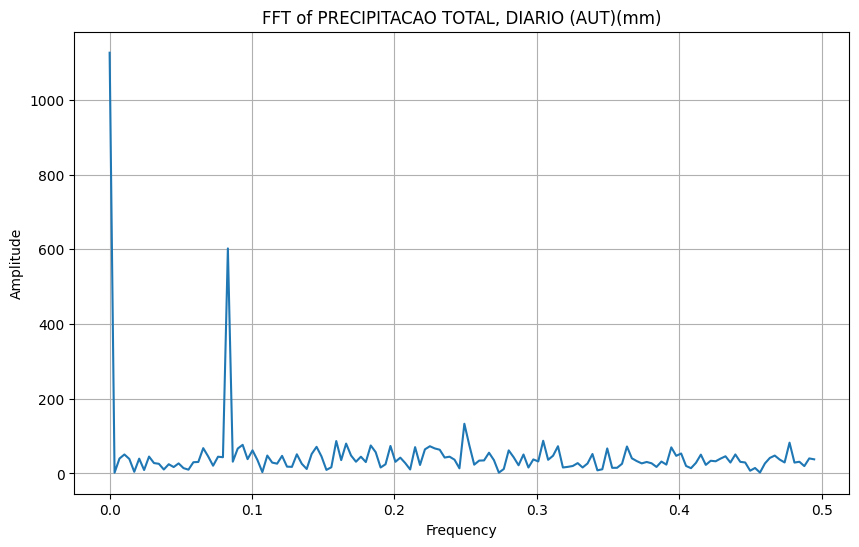

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A001_D_2000-05-06_2024-05-26


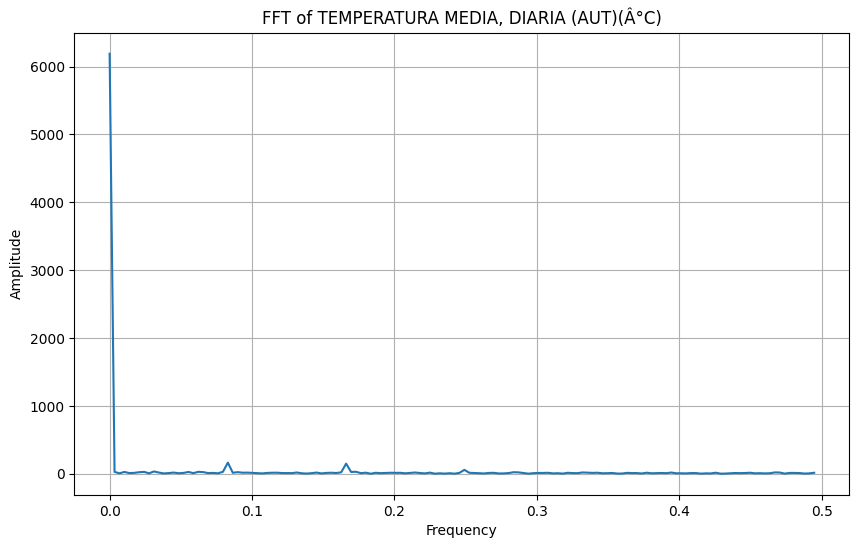

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A001_D_2000-05-06_2024-05-26


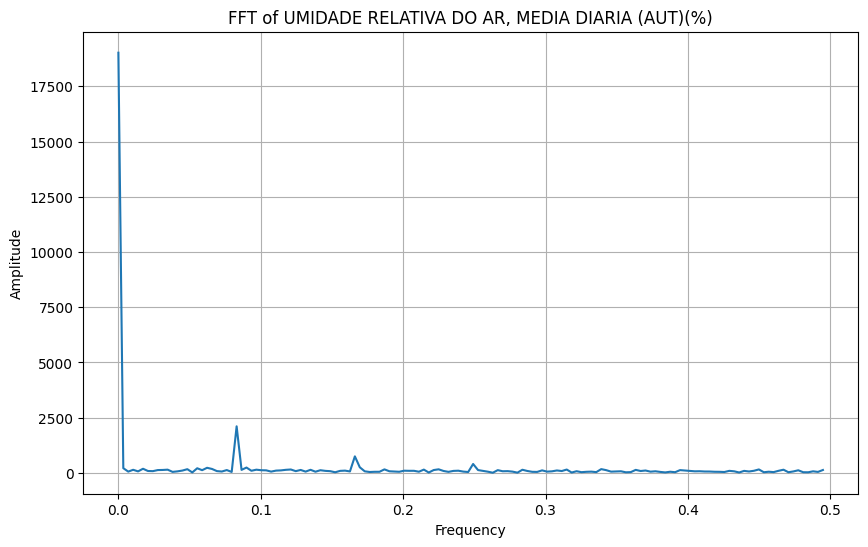

Processing DataFrame dados_A008_D_2003-06-12_2013-02-19/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A008_D_2003-06-12_2013-02-19


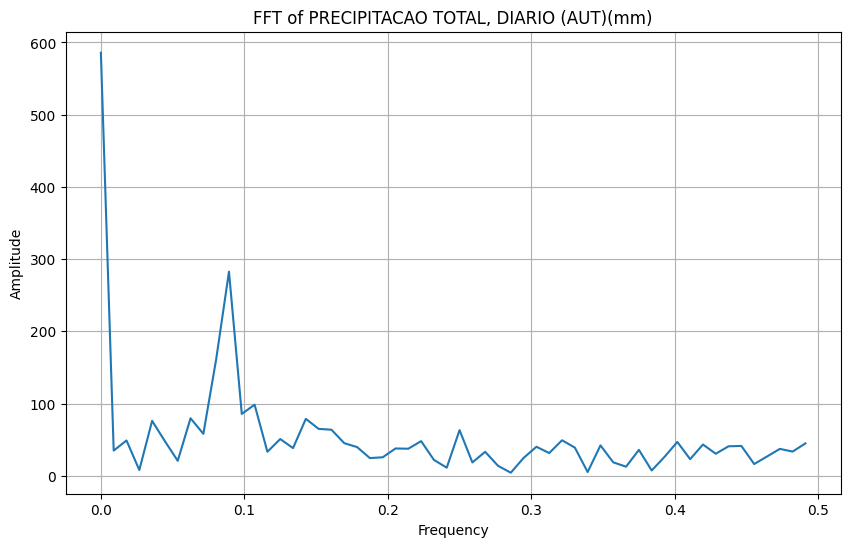

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A008_D_2003-06-12_2013-02-19


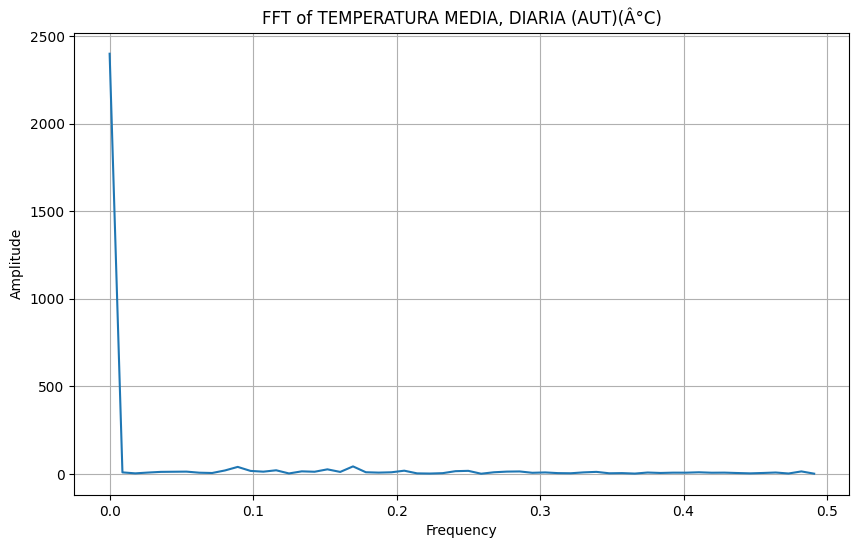

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A008_D_2003-06-12_2013-02-19


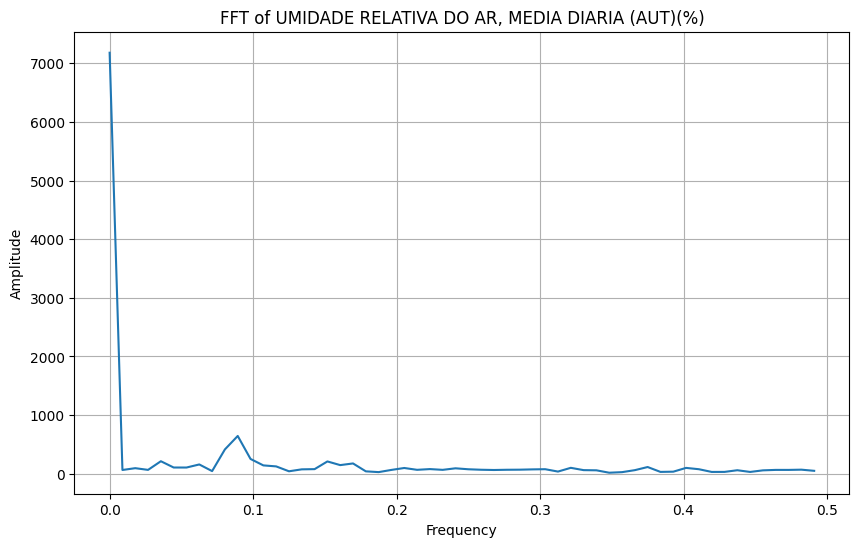

Processing DataFrame dados_A042_D_2017-07-18_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A042_D_2017-07-18_2024-05-26


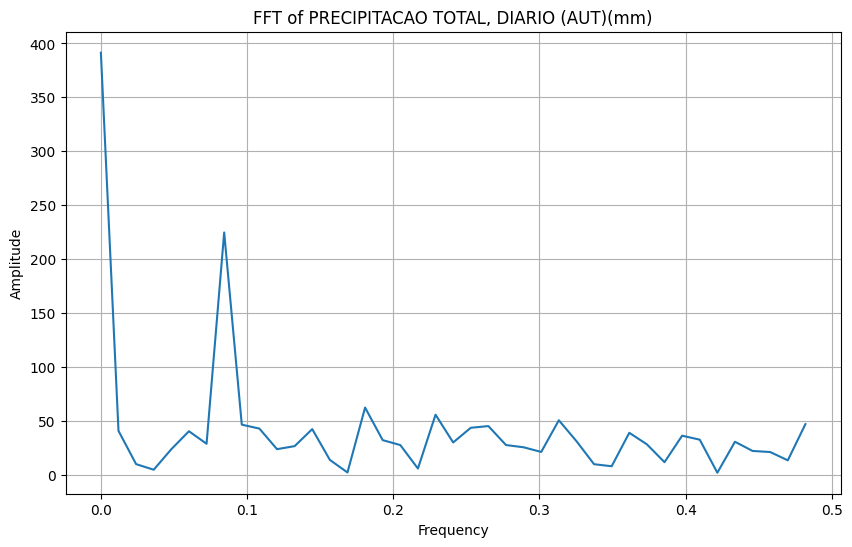

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A042_D_2017-07-18_2024-05-26


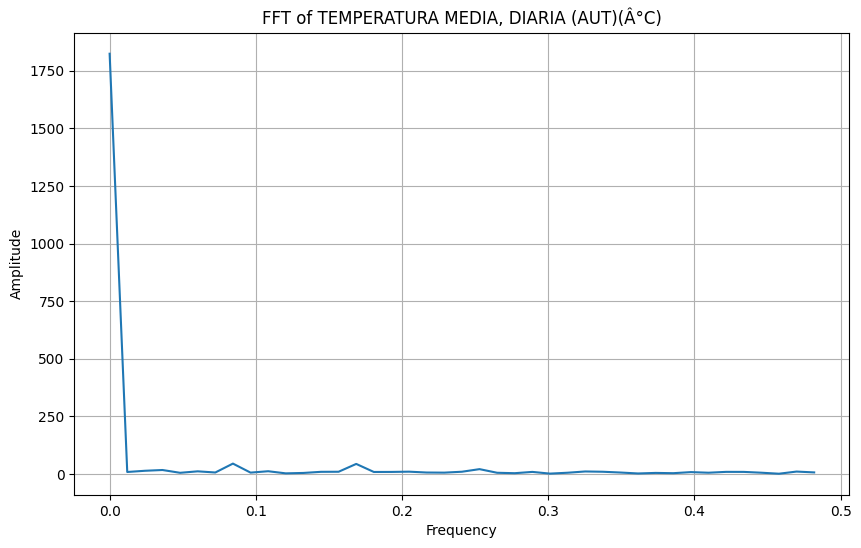

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A042_D_2017-07-18_2024-05-26


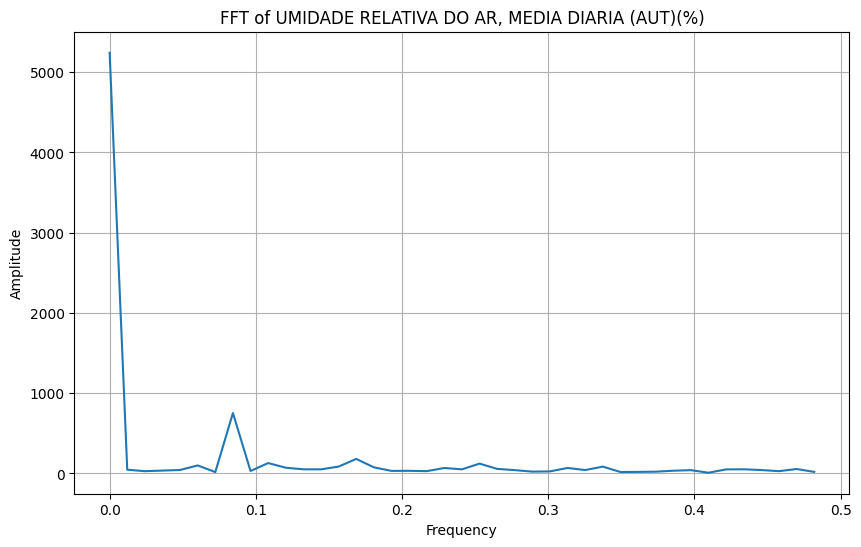

Processing DataFrame dados_A045_D_2008-10-02_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A045_D_2008-10-02_2024-05-26


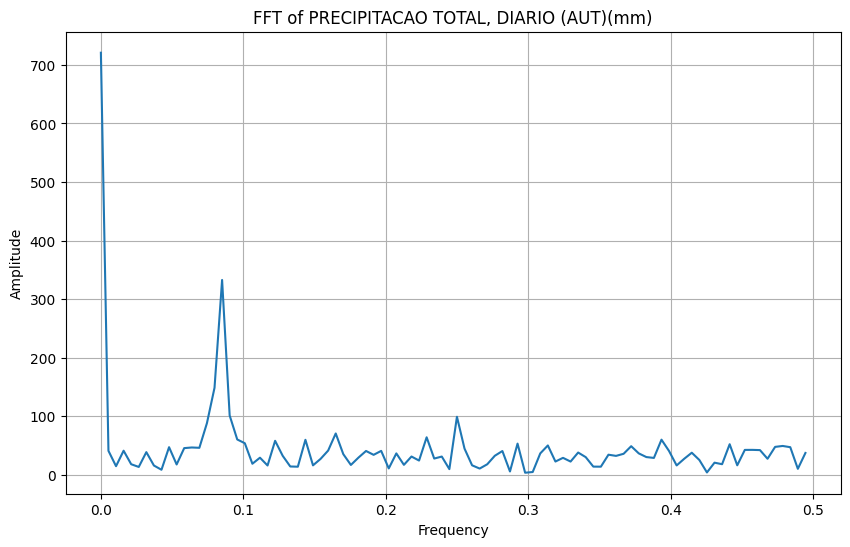

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A045_D_2008-10-02_2024-05-26


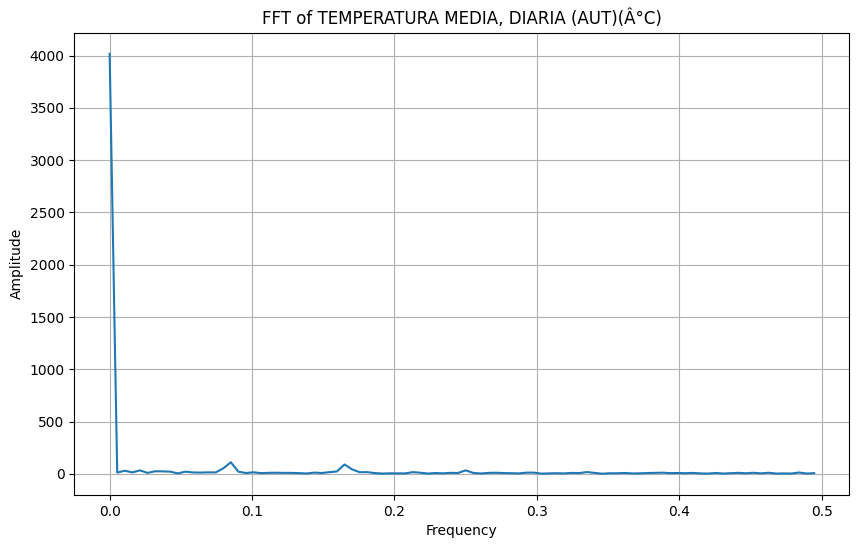

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A045_D_2008-10-02_2024-05-26


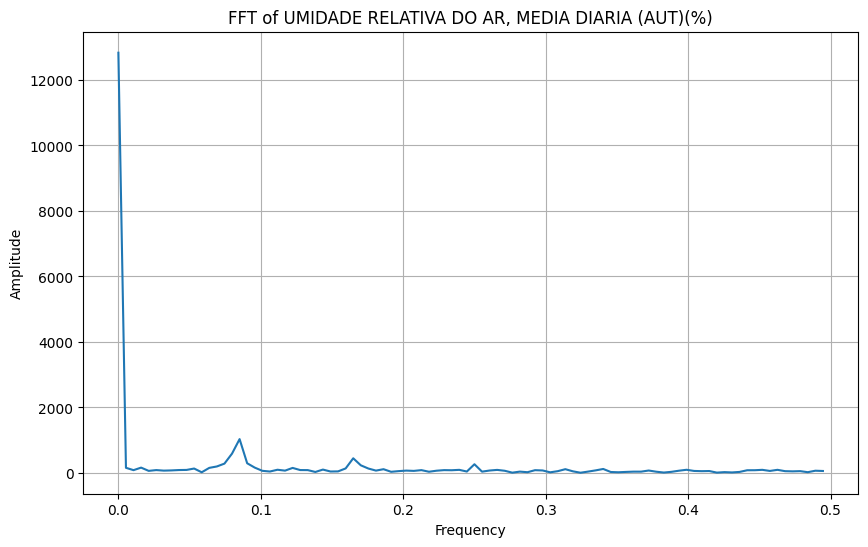

Processing DataFrame dados_A046_D_2014-09-30_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A046_D_2014-09-30_2024-05-26


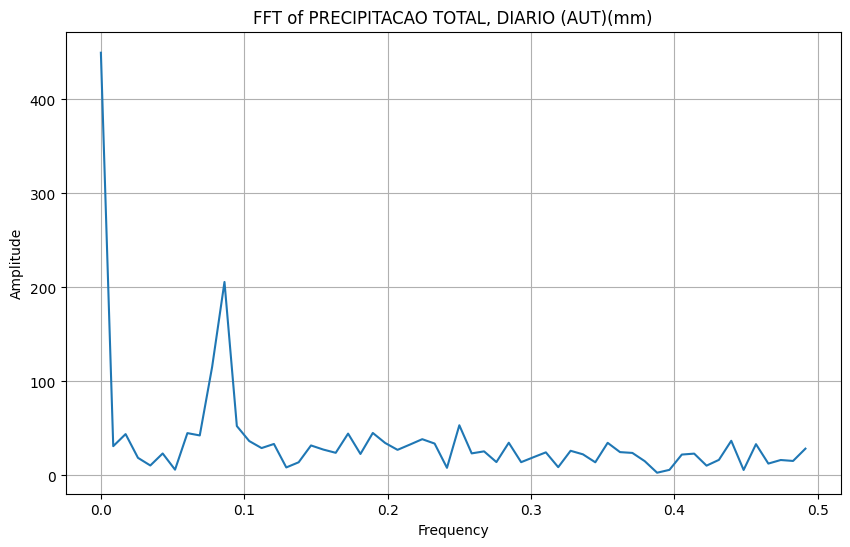

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A046_D_2014-09-30_2024-05-26


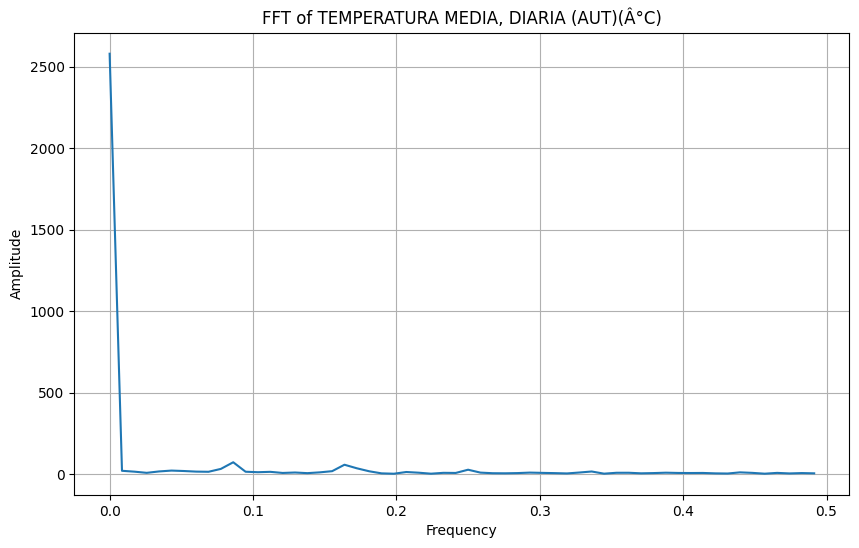

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A046_D_2014-09-30_2024-05-26


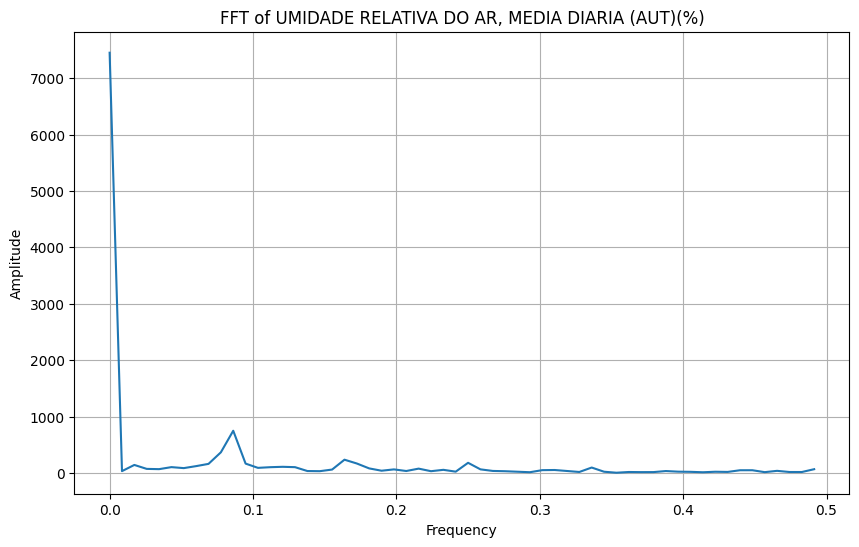

Processing DataFrame dados_A047_D_2017-02-06_2024-05-26/6
Plotting FFT for column: PRECIPITACAO TOTAL, DIARIO (AUT)(mm) from dados_A047_D_2017-02-06_2024-05-26


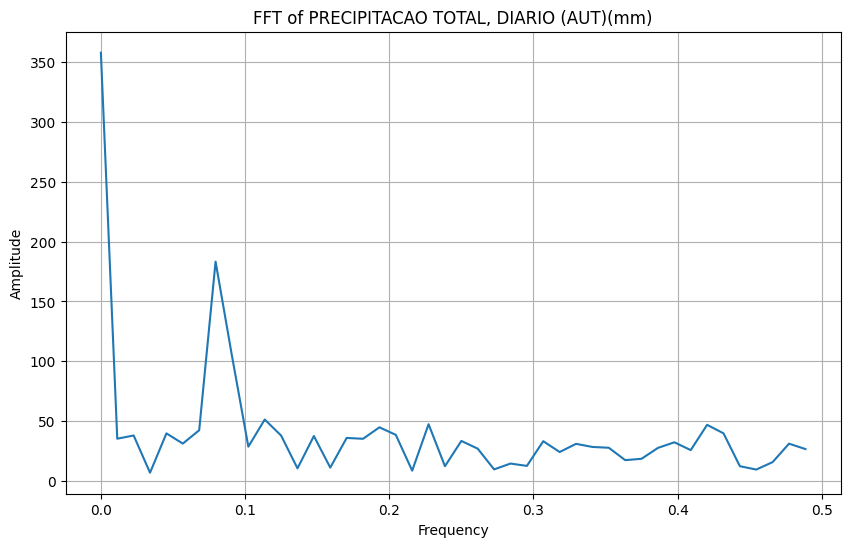

Plotting FFT for column: TEMPERATURA MEDIA, DIARIA (AUT)(Â°C) from dados_A047_D_2017-02-06_2024-05-26


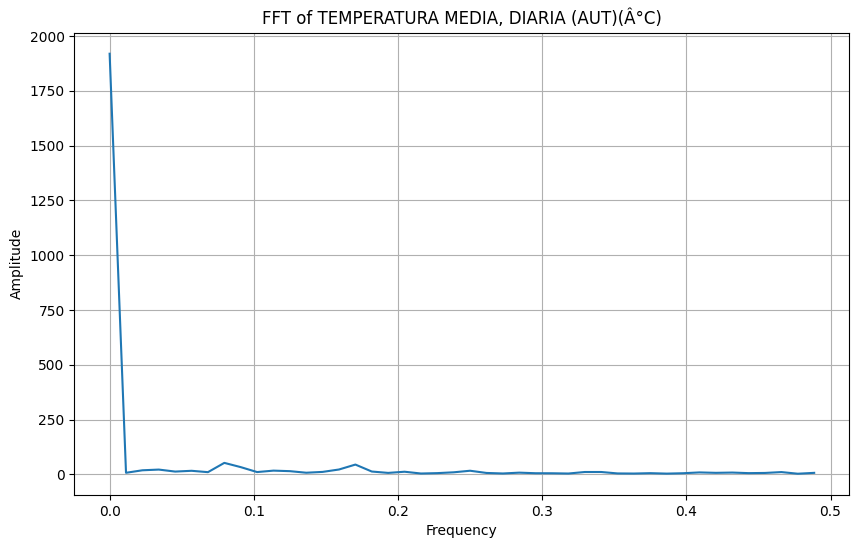

Plotting FFT for column: UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%) from dados_A047_D_2017-02-06_2024-05-26


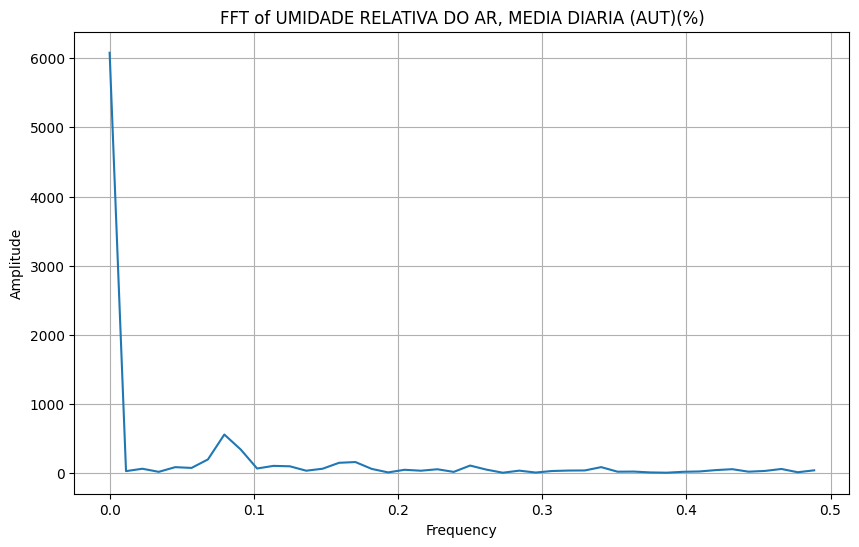

In [96]:
fft_process(stations)